In [ ]:
"""
    Object detection example
    More models on https://huggingface.co/models?pipeline_tag=object-detection&sort=downloads
    Use SHIFT + ENTER to execute block of code!!!
"""

In [2]:
"""
    Import packages to use model
"""

import os
import torch
from transformers import pipeline, DetrImageProcessor, DetrForObjectDetection
from PIL import Image, ImageDraw

/opt/homebrew/Caskroom/miniconda/base/envs/myenv2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
os.listdir("./images")

['image_three.jpg', 'image_one.jpg', 'image_two.jpeg', '.ipynb_checkpoints']

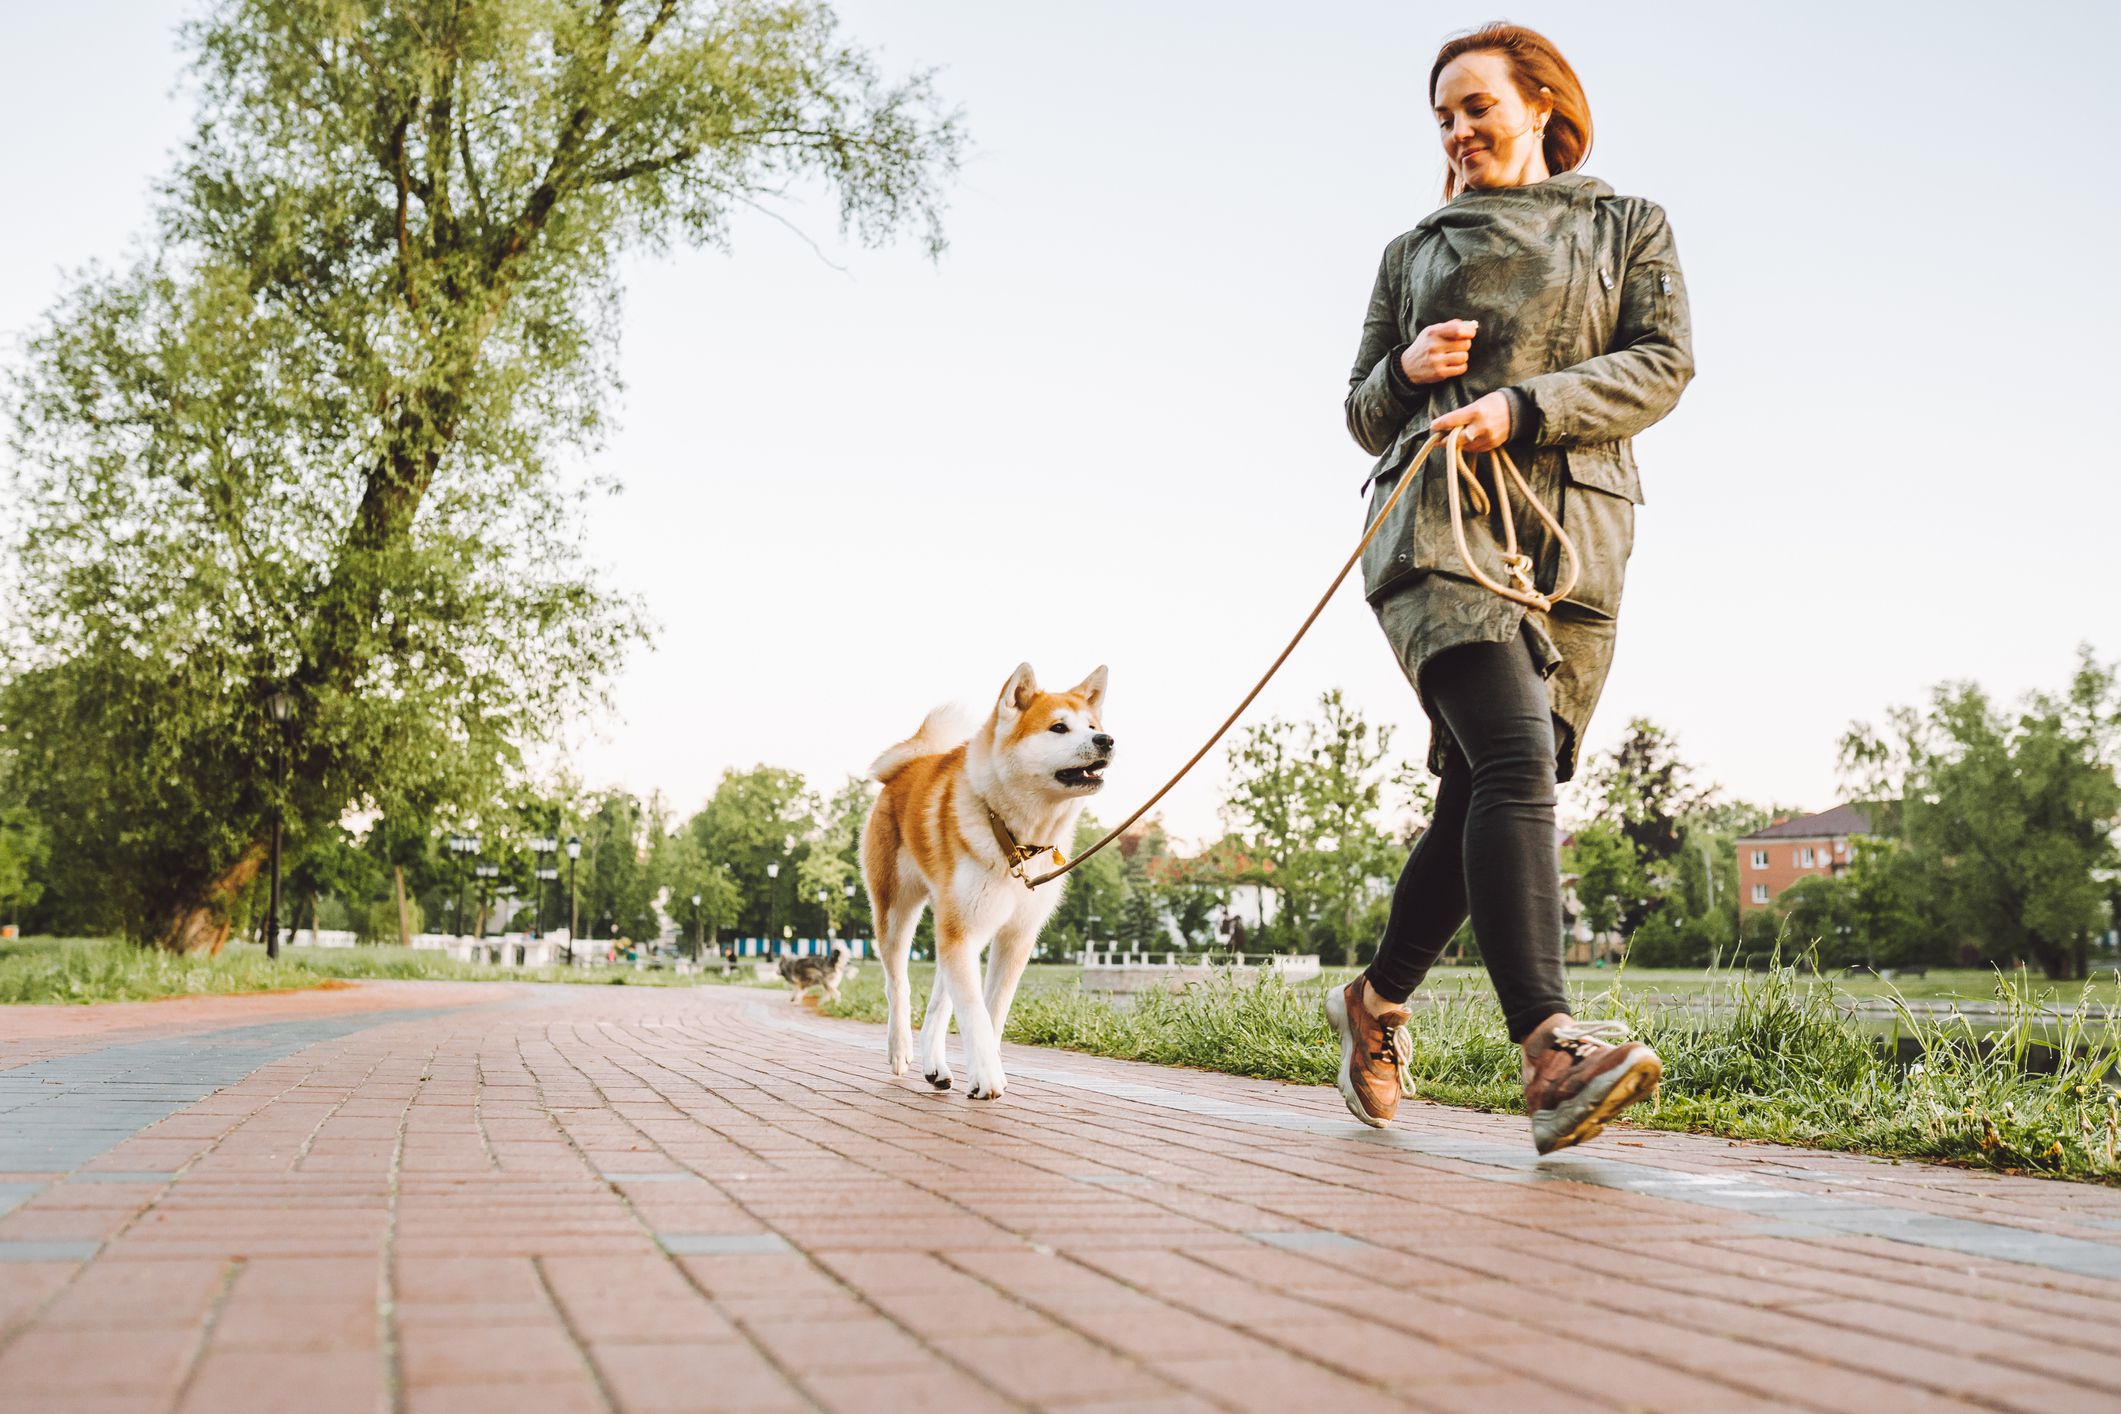

In [2]:
"""
    Show image
"""
Image.open(r"./images/image_three.jpg") 

In [5]:
images = [
    Image.open(r"./images/image_three.jpg")
]


In [3]:
"""
    Easy way
    Model facebook/detr-resnet-50
    
    Input
    random_image.jpg
    
    Result
    {'score': 0.999119222164154, 'label': 'dog', 'box': {'xmin': 825, 'ymin': 659, 'xmax': 1119, 'ymax': 1101}}
    {'score': 0.9996103644371033, 'label': 'person', 'box': {'xmin': 1334, 'ymin': 25, 'xmax': 1698, 'ymax': 1154}}
"""

pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

for image in images:
    classification_result = pipe(image)
    for result in classification_result:
        print(result)
    print("\n")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Could not find image processor class in the image processor config or the model conf

{'score': 0.999119222164154, 'label': 'dog', 'box': {'xmin': 825, 'ymin': 659, 'xmax': 1119, 'ymax': 1101}}
{'score': 0.9996103644371033, 'label': 'person', 'box': {'xmin': 1334, 'ymin': 25, 'xmax': 1698, 'ymax': 1154}}




In [3]:
"""
    Complex way
"""
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a Ber

In [9]:
"""
    Print labels, score and object locations
"""
inputs = processor(images=images[0], return_tensors="pt")
outputs = model(**inputs)

target_sizes = torch.tensor([images[0].size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(f"Detected {model.config.id2label[label.item()]} with confidence "
          f"{round(score.item(), 3)} at location {box}")

Detected dog with confidence 0.999 at location [825.26, 659.39, 1119.44, 1101.69]
Detected person with confidence 1.0 at location [1334.17, 25.64, 1698.73, 1154.89]


/var/folders/s6/nq5g7b495vj060rblsg0tz6c0000gn/T/ipykernel_7053/990430558.py:13: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text)
/var/folders/s6/nq5g7b495vj060rblsg0tz6c0000gn/T/ipykernel_7053/990430558.py:13: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text)


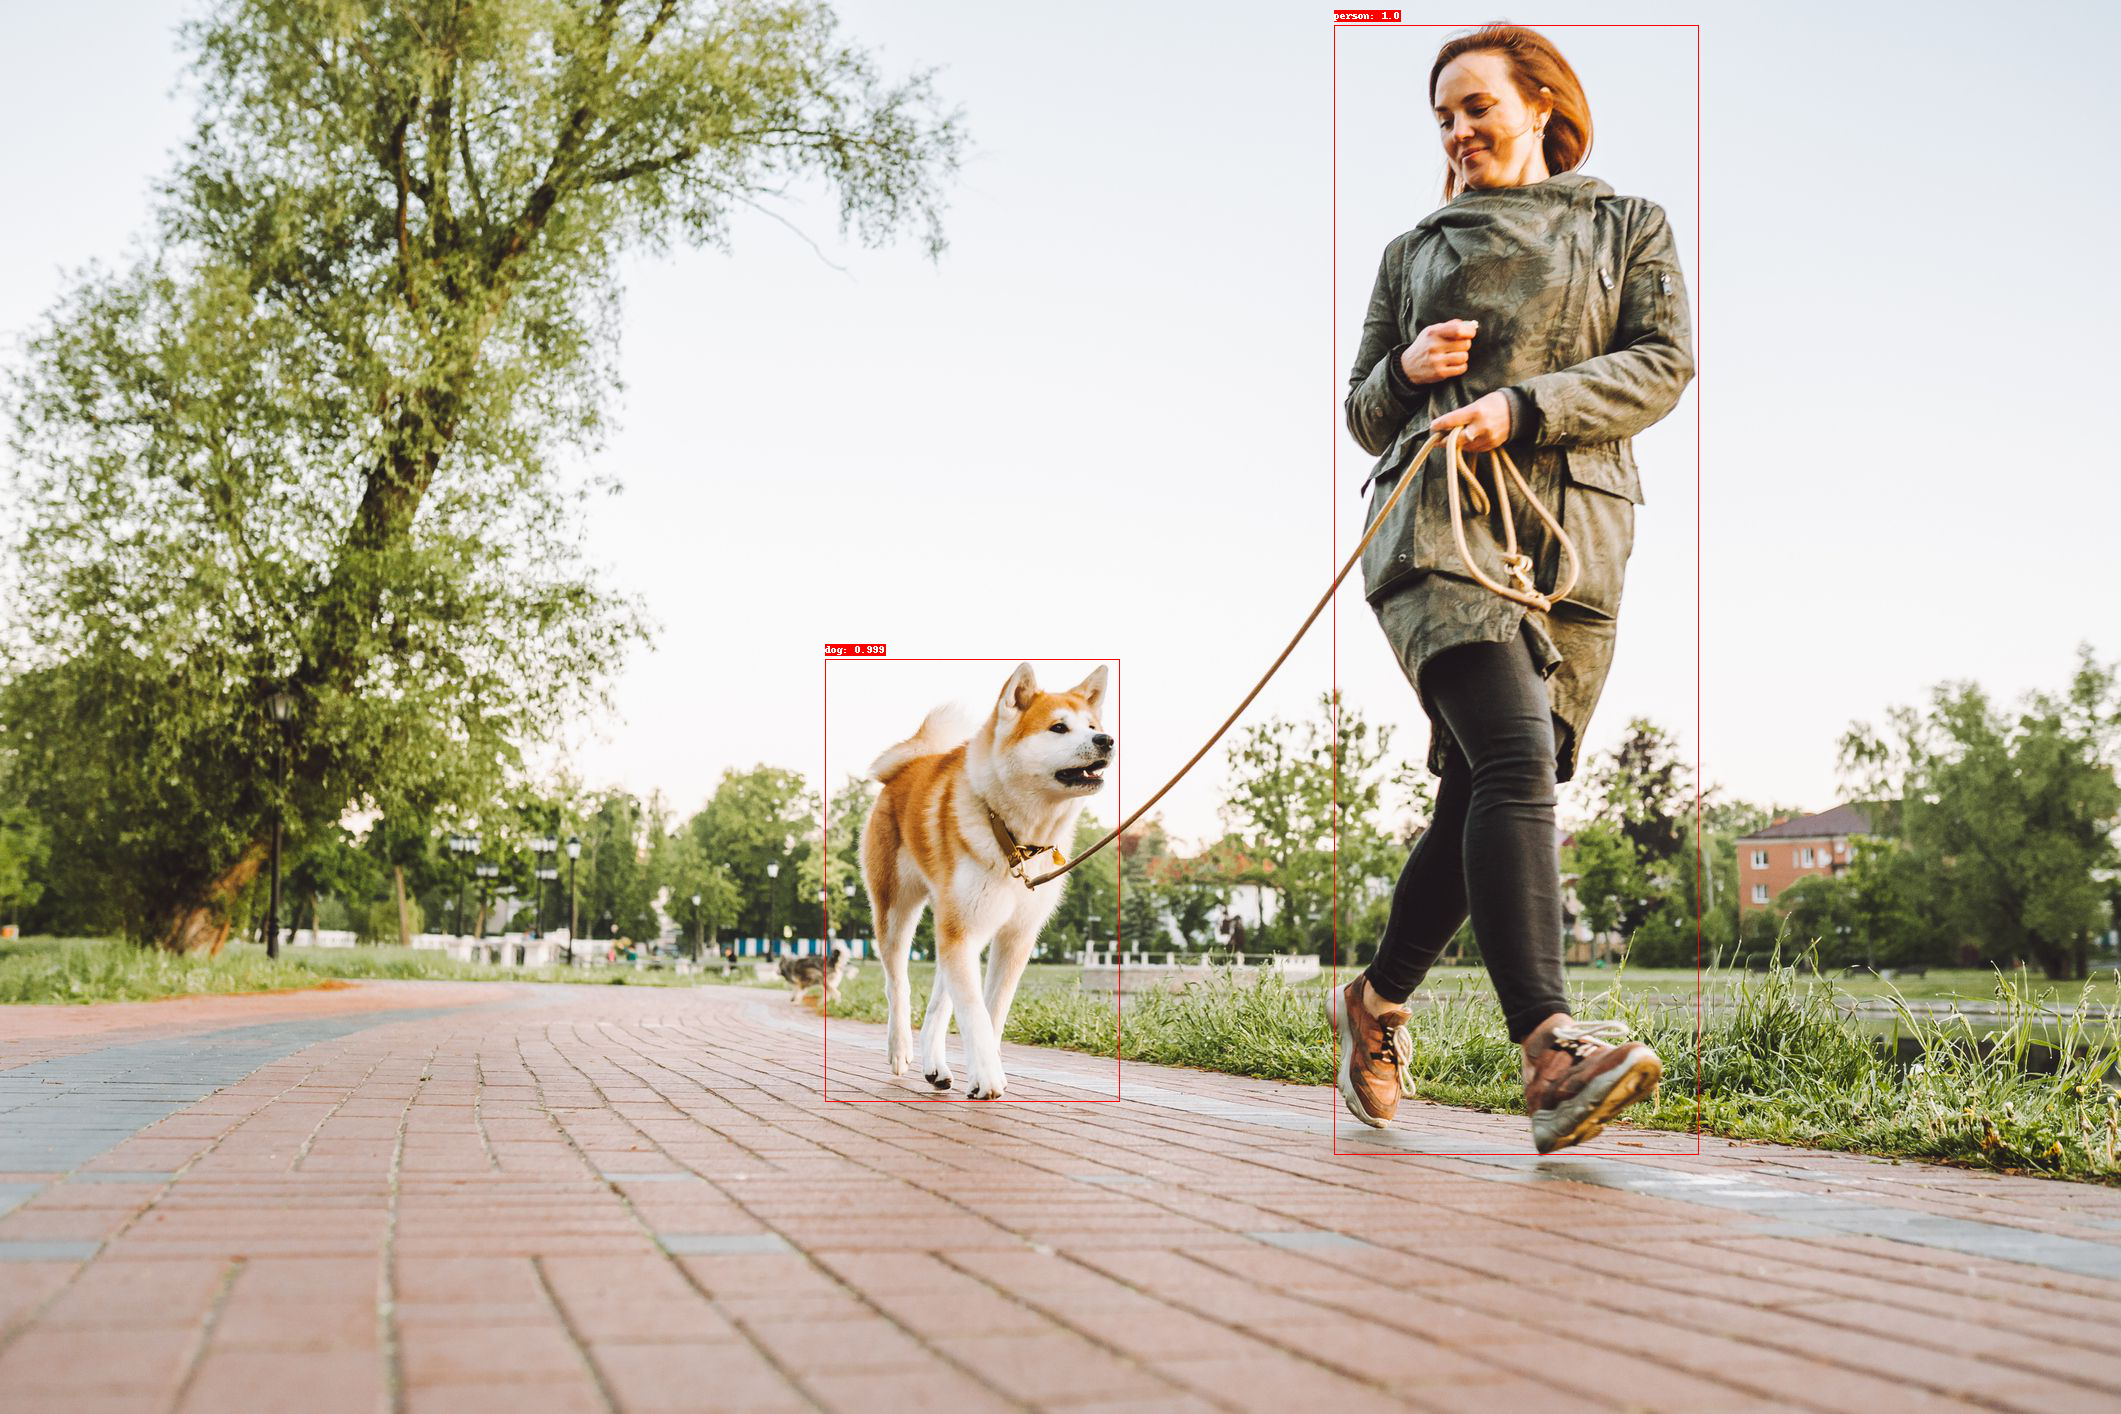

In [19]:
draw = ImageDraw.Draw(image)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    class_label = model.config.id2label[label.item()]
    confidence = round(score.item(), 3)

    # Draw rectangle
    draw.rectangle(box, outline="red")
    
    # Add text
    text = f"{class_label}: {confidence}"
    text_width, text_height = draw.textsize(text)
    text_location = [box[0], box[1] - text_height - 4]
    draw.rectangle([text_location[0], text_location[1], text_location[0] + text_width, text_location[1] + text_height], fill="red")
    draw.text(text_location, text, fill="white")

image